---
---

# **1 - K-Nearest Neighbors**

K nearest neighbors is the one of the simplest machine learning algorithms. It simply assigns a label to new data based on the **distance** between the old data and new data

KNN Algorithm:
 
 1. Choose K value
 2. Sort feature vestors (N dimensional space) by distance metric
 3. Choose class based on K nearest feature vectors

KNN Considerations:

1. Distance Metric (many ways to measure distance):

 * Minkowski
 * Euclidean
 * Manhattan
 * Chebyshev

2. Scaling is necessary for KNN
  
  Before Scaling:
  
  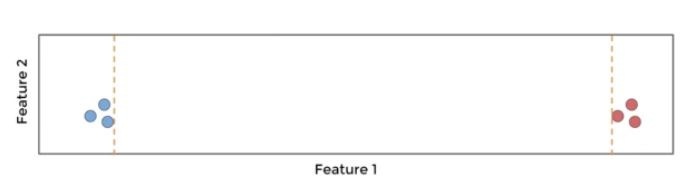
    
    After Scaling:

    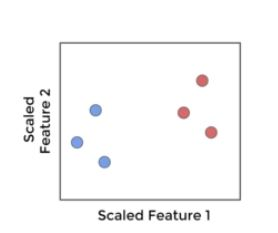

---
**How KNN works**

Assign a centroid:

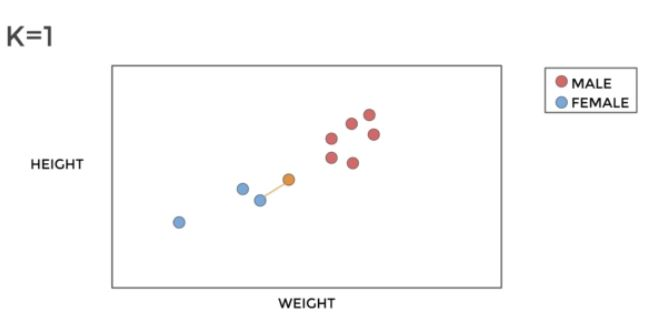

Classified as Female, because has more vote and closer distance:

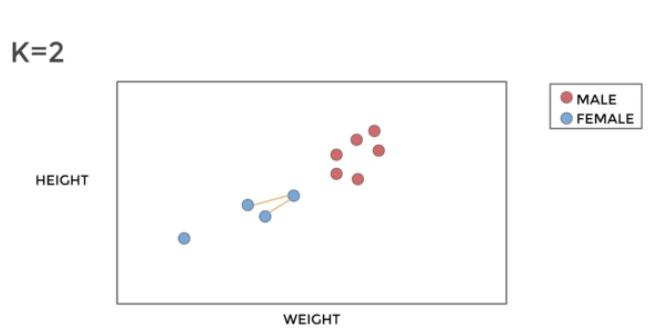

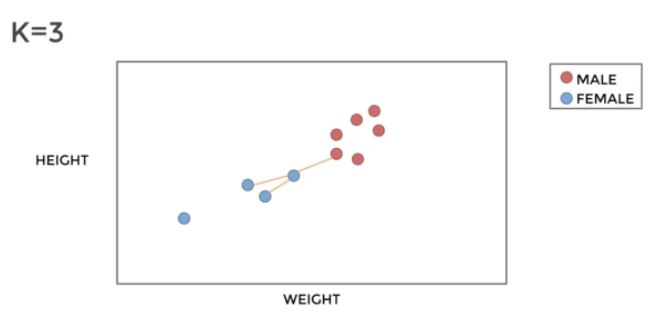

What happen if its tie?

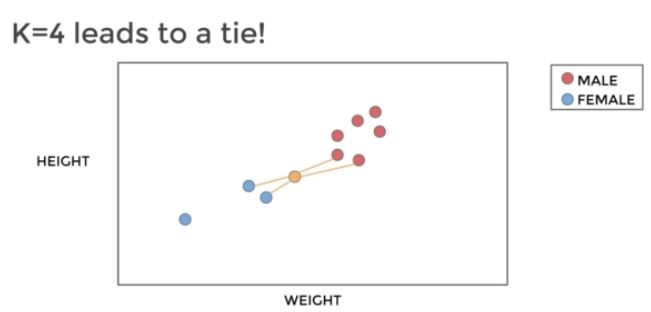



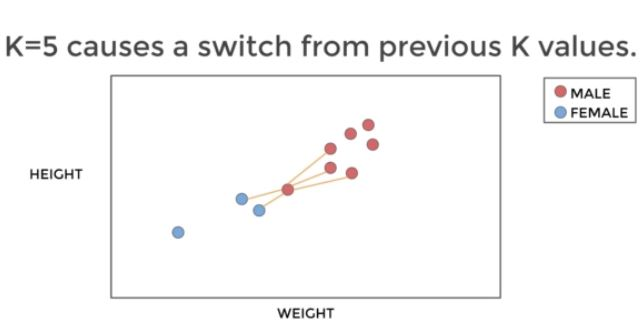

Tie considerations and options:
 * Always choose an odd K
 * In case of tie, simply reduce K by 1 until tie is broken
 * Randomly break tie
 * Choose nearest class point
 

---
**How to choose best K-value**

We want a k value that **minimizes** error

    Error = 1 - Accuracy

There are two methods to choose best k-value:
  * Elbow Method
  * Cross validate a grid search of multiple K values and choose K that results in lowest error or highest accuracy.

Elbow Method: Choose K-value that has low error and low model complexity

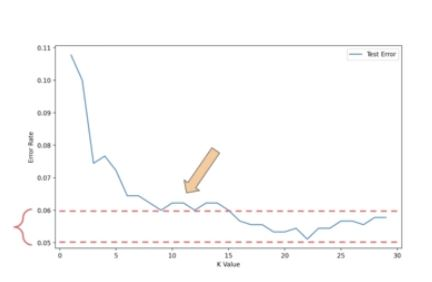

Grid Search to Choose K-value:

Cross validation only takes into account the K value with the lowest error rate across multiple folds. This could result in a more complex model (higher value of K). Consider the context of the problem to decide if larger K values are an issu

---

## **A. Data Set**

**Data**

To understand KNN for classification, we'll work with a simple dataset representing gene expression levels. Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes). This dataset is synthetic and specifically designed to show some of the strengths and limitations of using KNN for Classification.


More info on gene expression: https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/9_K_Nearest_Neighbors_with_Pipeline/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


---

## **B. Exploratory Data Analysis and Visualization**

Feel free to explore the data further on your own.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


---

### **a. Label Count**

In [7]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

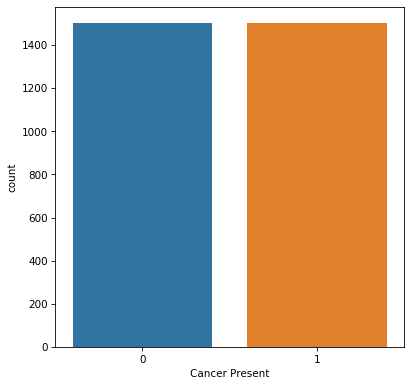

In [8]:
plt.figure(figsize=(6,6),dpi=75)
sns.countplot(data=df,x='Cancer Present')
plt.show()

balanced label class

---

### **b. Features Correlation**

**Create a heatmap that displays the correlation between all the columns.**

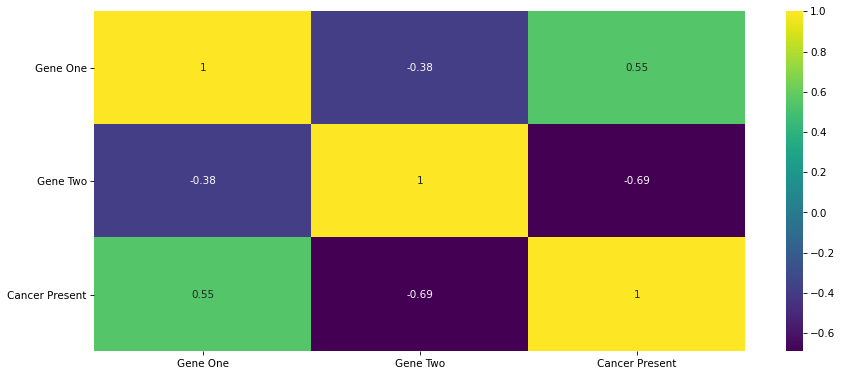

In [9]:
plt.figure(figsize=(14,6),dpi=75)
sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')
plt.yticks(rotation=0)
plt.show()

Gene One has bigger chance to detect Cancer

In [10]:
df.corr()['Cancer Present'].sort_values()

Gene Two         -0.692352
Gene One          0.545854
Cancer Present    1.000000
Name: Cancer Present, dtype: float64

---


#### **Plot KNN Decision Boundary**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

def plot_knn_boundary(n_neighbors, x, y, hue, data):
  # Create color maps
  cmap_light = ListedColormap(['cornflowerblue','orange']) #warna untuk color meshgrid
  cmap_bold = ['darkblue','darkorange'] #warna untuk sns scatter plot

  X = np.array(data[x]) # x-axis
  Y = np.array(data[y]) # y-axis
  h = 0.01  # step size in the mesh(semakin kecil -> semakin smooth boundary nya)


  #instance of Neighbours Classifier and fit the data.
  knn = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn.fit(df[[x,y]], df[hue]) # train on features 1 and 2 for predict plot contour

  # Plot the decision boundary (batas-batas grafik mesh)
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X.min() - 1, X.max() + 1
  y_min, y_max = Y.min() - 1, Y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  print(xx.shape)
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  print(Z.shape)
  plt.figure(figsize=(10,5),dpi=100)
  plt.contourf(xx, yy, Z, cmap=cmap_light)
    
  # Plot the test data
  sns.scatterplot(x=x, y=y, hue=hue, data=data,
                  palette=cmap_bold, edgecolor="black", alpha=0.8)
    
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(f'K-Nearest Neighbors Decision Boundaries (K:{n_neighbors})')
  plt.xlabel(x)
  plt.ylabel(y);

(1100, 1100)
(1100, 1100)


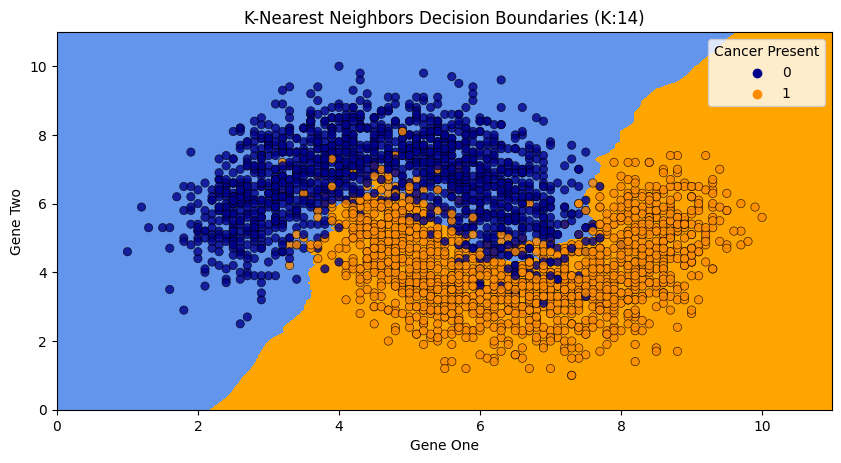

In [12]:
plot_knn_boundary(14, x='Gene One', y='Gene Two', hue='Cancer Present', data=df)

---


### **c. Features Relationship**

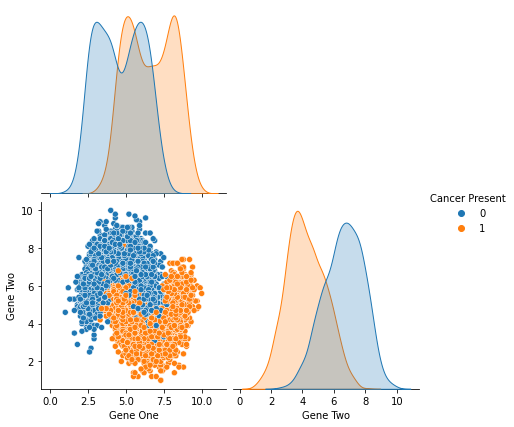

In [13]:
sns.pairplot(data=df, hue='Cancer Present', corner=True, height=3)
plt.show()

We can see, the Gene Two is normal distribution but the Gene One is not

Lets Zoom it:

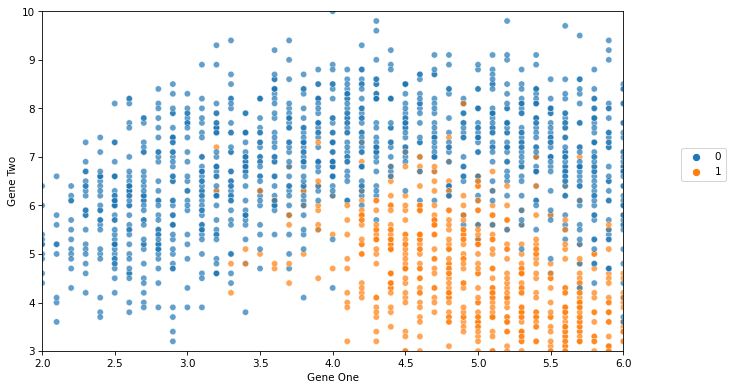

In [14]:
plt.figure(figsize=(10,6),dpi=75)
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))
plt.show()

---
---

## **C. K-Nearest Neighbors Model**

### **a. Setup**

#### **Train | Test Split**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape

(2100, 2)

In [19]:
X_test.shape

(900, 2)

---

#### **Scaling the Data**

**Rescale data to have mean (u) of 0 and standard deviation of 1**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
# Fit and Transform training data
# (fit is to calculate statistical information)
scaled_X_train = scaler.fit_transform(X_train)

In [23]:
# Transform test data
scaled_X_test = scaler.transform(X_test)

---

### **b. Create Estimator/Model**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

---

#### Elbow Method for Choosing Reasonable K Values

**NOTE: This uses the test set for the hyperparameter selection of K.**

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

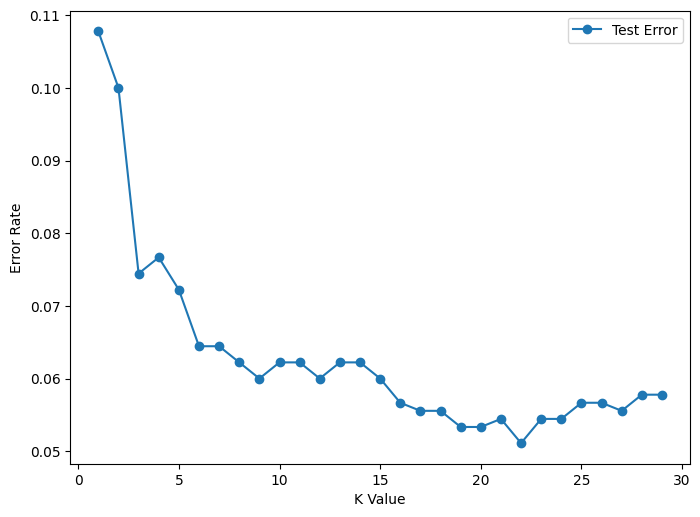

In [27]:
plt.figure(figsize=(8,6),dpi=100)
plt.plot(range(1,30), test_error_rates, label='Test Error', marker='o')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value");

---

#### **Creating a Pipeline to find K value**

**Follow along very carefully here! We use very specific string codes AND variable names here so that everything matches up correctly. This is not a case where you can easily swap out variable names for whatever you want!**

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

----
*How does the Scaler work inside a Pipeline with CV? Is scikit-learn "smart" enough to understand .fit() on train vs .transform() on train and test?**

**Yes! Scikit-Learn's pipeline is well suited for this! [Full Info in Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) **

When you use the StandardScaler as a step inside a Pipeline then scikit-learn will internally do the job for you.

What happens can be discribed as follows:

* Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.
* Step 1: the scaler is fitted on the TRAINING data
* Step 2: the scaler transforms TRAINING data
* Step 3: the models are fitted/trained using the transformed TRAINING data
* Step 4: the scaler is used to transform the TEST data
* Step 5: the trained models predict using the transformed TEST data



A Pipeline object in Scikit-Learn can set up a sequence of repeated operations, such as a scaler and a model. This way only the pipeline needs to be called, instead of having repeatedly call a scaler and a model.

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [30]:
# Parameters of KNN that can be adjusted
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [31]:
# Highly recommend string code matches variable name!
operations = [('scaler', scaler),
              ('knn', knn)]

In [32]:
pipe = Pipeline(operations)


**Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).



In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
k_values = list(range(1,20))

In [35]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [36]:
# using pipeline, must match the format
param_grid = {'knn__n_neighbors': k_values}

In [37]:
grid_knn_pipe = GridSearchCV(pipe, 
                              param_grid, 
                              cv=5, 
                              scoring='accuracy')

---

#### **Fit/Train Model**

In [38]:
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)
grid_knn_pipe.fit(X_train, y_train) # Dont use scaled, because the pipe already has scaler

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
           

---

#### **Coefficients/Parameters**

In [39]:
# Return the best estimators and parameters
grid_knn_pipe.best_estimator_.get_params()

{'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                      weights='uniform'),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                        weights='uniform'))],
 'verbose': False}

In [40]:
# Return the best estimators
grid_knn_pipe.best_params_

{'knn__n_neighbors': 14}

In [41]:
# Return keys of cross validation scoring
grid_knn_pipe.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

Let's check our understanding:
**How many total runs did we do?**

In [42]:
# Mean Accuracy each K value
grid_knn_pipe.cv_results_['mean_test_score']

array([0.90238095, 0.90285714, 0.91857143, 0.91333333, 0.92380952,
       0.92142857, 0.9252381 , 0.9247619 , 0.9252381 , 0.92190476,
       0.9252381 , 0.9247619 , 0.92761905, 0.92904762, 0.92809524,
       0.92809524, 0.92904762, 0.92857143, 0.92761905])

---

### **c. Performance Evaluation**



#### **Classification Metrics on Test Set**

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [44]:
y_pred = grid_knn_pipe.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.9377777777777778

In [46]:
confusion_matrix(y_test, y_pred)

array([[448,  22],
       [ 34, 396]])

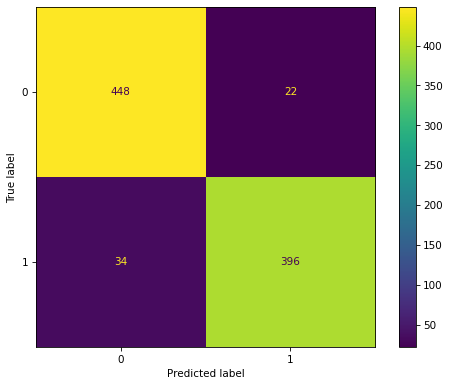

In [47]:
fig, ax = plt.subplots(figsize=(8,6), dpi=75)
plot_confusion_matrix(grid_knn_pipe, X_test, y_test, ax=ax, values_format='d')
plt.show()

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



---

#### **Performance Curves**

**Create both the precision recall curve and the ROC Curve.**

In [49]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

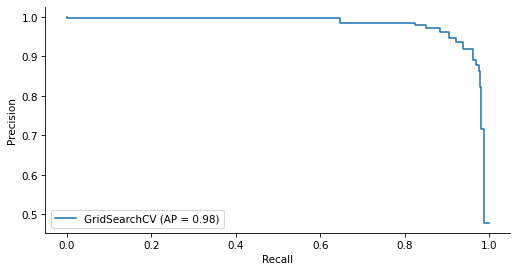

In [50]:
fig, ax = plt.subplots(figsize=(8,4), dpi=75)
plot_precision_recall_curve(grid_knn_pipe, X_test, y_test, ax=ax)
sns.despine(); # Remove border from graph

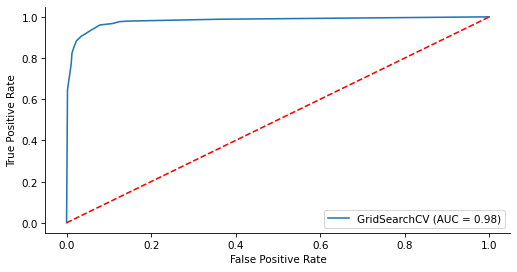

In [51]:
# Receiver Operating Characteristic
fig, ax = plt.subplots(figsize=(8,4), dpi=75)
plot_roc_curve(grid_knn_pipe, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--')
sns.despine();

---
---

# **2 - Finalize Model**

## **A. Re-Train/Fit Model on All Data**

We just saw that our  GridSearch recommends a K=14 (in line with our alternative Elbow Method). Let's now use the PipeLine again.

**NOTE: If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model).**

In [52]:
scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)
operations = [('scaler', scaler),('knn14', knn14)]

In [53]:
pipe = Pipeline(operations)

In [54]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn14',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=14, p=2,
                                      weights='uniform'))],
         verbose=False)

---

## **B. Prediction on New Data**

In [55]:
single_sample = X_test.iloc[40]

In [56]:
single_sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [57]:
single_sample.values.reshape(1, -1) # 2D array with 1 row and 2 column

array([[3.8, 6.3]])

In [58]:
pipe.classes_

array([0, 1])

In [59]:
pipe.predict(single_sample.values.reshape(1, -1))

array([0])

In [60]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[0.85714286, 0.14285714]])

----
---